## Importing required libraries

In [2]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing data

In [28]:
data = pd.read_csv("./data/train.csv", index_col="PassengerId")
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [30]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [31]:
data["Name"].value_counts()

Gollux Reedall        2
Elaney Webstephrey    2
Grake Porki           2
Sus Coolez            2
Apix Wala             2
                     ..
Jamela Griffy         1
Hardy Griffy          1
Salley Mckinn         1
Mall Frasp            1
Propsh Hontichre      1
Name: Name, Length: 8473, dtype: int64

In [32]:
8493 - 8473

20

## Data Cleaning

In [33]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [35]:
data.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

### Filling null values

#### `HomePlanet` values with their mode i.e. `'Earth'`

In [36]:
data["HomePlanet"].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [37]:
data["HomePlanet"].fillna("Earth", inplace=True)

In [38]:
data["HomePlanet"].isnull().sum()

0

#### `CryoSleep` values with their mode i.e. `False`

In [39]:
data["CryoSleep"].value_counts(dropna=False)

False    5439
True     3037
NaN       217
Name: CryoSleep, dtype: int64

In [40]:
data["CryoSleep"].fillna(False, inplace=True)

In [41]:
data["CryoSleep"].isnull().sum()

0

In [42]:
data["CryoSleep"].value_counts(dropna=False)

False    5656
True     3037
Name: CryoSleep, dtype: int64

In [43]:
data["CryoSleep"].replace({False:0, True:1}, inplace=True)

In [44]:
data["CryoSleep"]

PassengerId
0001_01    0
0002_01    0
0003_01    0
0003_02    0
0004_01    0
          ..
9276_01    0
9278_01    1
9279_01    0
9280_01    0
9280_02    0
Name: CryoSleep, Length: 8693, dtype: int64

In [47]:
data.sample(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
3305_02,Mars,0,D/106/P,55 Cancri e,31.0,False,1065.0,13.0,150.0,36.0,0.0,Vivers Jaff,False
8997_01,Earth,1,F/1742/S,55 Cancri e,15.0,False,0.0,NaN,0.0,0.0,0.0,Dont Guerson,True
2747_01,Mars,0,F/570/P,TRAPPIST-1e,49.0,NaN,0.0,0.0,0.0,0.0,0.0,Stisps Chrie,True
1100_01,Mars,0,F/226/P,TRAPPIST-1e,18.0,False,490.0,355.0,298.0,245.0,0.0,Ros Cuche,False
1144_01,Earth,0,G/177/S,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Molley Barnolderg,True
1855_02,Earth,0,E/113/P,TRAPPIST-1e,39.0,False,0.0,43.0,864.0,0.0,85.0,Mabela Jenson,False
3997_01,Earth,0,G/657/S,55 Cancri e,25.0,False,0.0,83.0,0.0,439.0,0.0,Aliedy Yanton,False
1407_01,Earth,0,F/278/P,TRAPPIST-1e,21.0,False,737.0,4.0,27.0,8.0,0.0,Lerome Foxter,False
8956_02,Earth,1,G/1453/P,NaN,20.0,False,0.0,0.0,0.0,0.0,0.0,Erina Bonnondry,True


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


#### `Cabin` values with highly occuring random values (count > 5)

In [49]:
data["Cabin"].value_counts(dropna=False)

NaN        199
G/734/S      8
C/137/S      7
B/201/P      7
G/109/P      7
          ... 
G/556/P      1
E/231/S      1
G/545/S      1
G/543/S      1
C/178/S      1
Name: Cabin, Length: 6561, dtype: int64

In [50]:
data["Cabin"].describe()

count        8494
unique       6560
top       G/734/S
freq            8
Name: Cabin, dtype: object

#### count is `8`, `7` & `6`

In [89]:
cabin_values = data["Cabin"].value_counts().head(47).index
cabin_values

Index(['C/42/P', 'F/1194/P', 'B/11/S', 'F/1411/P', 'G/292/S', 'G/943/S',
       'C/255/S', 'C/306/S', 'B/183/S', 'E/13/S', 'B/19/S', 'D/56/P',
       'C/225/P', 'A/67/P', 'G/1476/S', 'G/150/S', 'G/1368/P', 'C/319/S',
       'G/117/S', 'C/137/S', 'G/657/P', 'G/974/P', 'B/201/P', 'C/125/S',
       'B/82/S', 'G/230/S', 'C/21/P', 'G/981/S', 'C/82/P', 'G/734/S',
       'G/383/S', 'D/176/S', 'G/186/S', 'F/856/P', 'G/377/P', 'G/1448/S',
       'F/859/P', 'G/330/P', 'G/765/S', 'F/1808/P', 'G/1108/P', 'E/82/P',
       'E/0/S', 'G/1460/S', 'G/109/P', 'G/1046/S', 'C/230/S'],
      dtype='object')

In [84]:
data["Cabin"].fillna("missing", inplace=True)

In [85]:
data["Cabin"] = data["Cabin"].map(
    lambda x: random.choice(cabin_values) if x=="missing" else x
)

In [86]:
data["Cabin"].value_counts(dropna=False)

C/42/P      15
F/1194/P    14
B/11/S      14
F/1411/P    13
G/292/S     13
            ..
F/643/S      1
F/642/S      1
G/540/S      1
F/641/S      1
B/152/P      1
Name: Cabin, Length: 6560, dtype: int64

In [88]:
data["Cabin"].isnull().sum()

0

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


#### `Destination` with it's mode i.e. `TRAPPIST-1e`

In [92]:
data["Destination"].value_counts(dropna=False)

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
NaN               182
Name: Destination, dtype: int64

In [99]:
data["Destination"].mode()[0]

'TRAPPIST-1e'

In [97]:
data["Destination"].fillna("TRAPPIST-1e", inplace=True)

In [98]:
data["Destination"].isna().sum()

0

#### `Age` values with it's median i.e. `27`

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [101]:
data["Age"].value_counts(dropna=False)

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 81, dtype: int64

(array([245., 150., 104.,  92.,  88.,  86., 182., 293., 305., 613., 588.,
        583., 567., 527., 497., 385., 377., 319., 355., 299., 257., 247.,
        204., 185., 155., 133., 113., 135.,  94.,  82.,  66.,  52.,  52.,
         20.,  18.,  16.,  11.,   9.,   4.,   6.]),
 array([ 0.   ,  1.975,  3.95 ,  5.925,  7.9  ,  9.875, 11.85 , 13.825,
        15.8  , 17.775, 19.75 , 21.725, 23.7  , 25.675, 27.65 , 29.625,
        31.6  , 33.575, 35.55 , 37.525, 39.5  , 41.475, 43.45 , 45.425,
        47.4  , 49.375, 51.35 , 53.325, 55.3  , 57.275, 59.25 , 61.225,
        63.2  , 65.175, 67.15 , 69.125, 71.1  , 73.075, 75.05 , 77.025,
        79.   ]),
 <BarContainer object of 40 artists>)

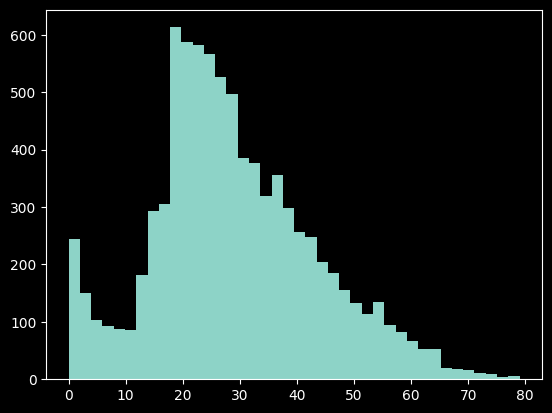

In [107]:
plt.hist(data["Age"], bins=40)

In [108]:
data["Age"].mean()

28.82793046746535

In [118]:
data["Age"].mode()

0    27.0
Name: Age, dtype: float64

In [112]:
data["Age"].median()

27.0

In [111]:
data["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [114]:
data["Age"].fillna(data["Age"].median(), inplace=True)

In [120]:
data["Age"].isna().sum()

0

#### `VIP` values with mode i.e. `False`

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [123]:
data["VIP"].value_counts(dropna=False)

False    8291
NaN       203
True      199
Name: VIP, dtype: int64

In [124]:
data["VIP"].fillna(False, inplace=True)

In [125]:
data["VIP"].isna().sum()

0

In [126]:
data["VIP"].value_counts(dropna=False)

False    8494
True      199
Name: VIP, dtype: int64

In [127]:
data["VIP"].replace({False:0, True:1}, inplace=True)

In [128]:
data["VIP"].value_counts()

0    8494
1     199
Name: VIP, dtype: int64

#### `RoomService` values with their mode i.e. `0`

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [130]:
data["RoomService"].sample(10)

PassengerId
6394_02       0.0
5269_01      38.0
3719_02       0.0
5229_01       0.0
6634_02       0.0
4185_01       0.0
1439_02     806.0
3561_02    1617.0
8674_01    4924.0
7787_02       0.0
Name: RoomService, dtype: float64

In [131]:
data["RoomService"].value_counts(dropna=False)

0.0       5577
NaN        181
1.0        117
2.0         79
3.0         61
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1274, dtype: int64

In [134]:
data["RoomService"].fillna(0, inplace=True)

In [136]:
data.RoomService.isna().sum()

0

#### `FoodCourt` values with their mode i.e. `0`

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [140]:
data["FoodCourt"].describe()

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

In [141]:
data.FoodCourt.median()

0.0

In [142]:
data.FoodCourt.mode()

0    0.0
Name: FoodCourt, dtype: float64

In [143]:
data.FoodCourt.value_counts(dropna=False)

0.0       5456
NaN        183
1.0        116
2.0         75
3.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1508, dtype: int64

In [144]:
data.FoodCourt.fillna(0, inplace=True)

#### `ShoppingMall` values with their mode i.e. `0`

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [146]:
data["ShoppingMall"].value_counts(dropna=False)

0.0       5587
NaN        208
1.0        153
2.0         80
3.0         59
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1116, dtype: int64

In [147]:
data["ShoppingMall"].fillna(0, inplace=True)

In [148]:
data["ShoppingMall"].value_counts(dropna=False)

0.0       5795
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64

In [149]:
data["ShoppingMall"].isna().sum()

0

#### `Spa` values with their mode i.e. `0`

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [151]:
data["Spa"].value_counts(dropna=False)

0.0       5324
NaN        183
1.0        146
2.0        105
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1328, dtype: int64

In [152]:
data["Spa"].fillna(0, inplace=True)

In [153]:
data["Spa"].value_counts(dropna=False)

0.0       5507
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64

#### `VRDeck` values with their mode i.e. `0`

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [156]:
data["VRDeck"].value_counts(dropna=False)

0.0       5495
NaN        188
1.0        139
2.0         70
3.0         56
          ... 
297.0        1
1788.0       1
1113.0       1
9244.0       1
3235.0       1
Name: VRDeck, Length: 1307, dtype: int64

In [157]:
data["VRDeck"].fillna(0, inplace=True)

#### Dropping `Name` column

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Cabin         8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   VIP           8693 non-null   int64  
 6   RoomService   8693 non-null   float64
 7   FoodCourt     8693 non-null   float64
 8   ShoppingMall  8693 non-null   float64
 9   Spa           8693 non-null   float64
 10  VRDeck        8693 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [163]:
data.drop(columns="Name", inplace=True)

In [164]:
data.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True
0005_01,Earth,0,F/0/P,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,True
0006_01,Earth,0,F/2/S,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,True
0006_02,Earth,1,G/0/S,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,True
0007_01,Earth,0,F/3/S,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,True


In [165]:
data.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [166]:
data.describe()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.349362,28.790291,0.022892,220.009318,448.434027,169.572300,304.588865,298.261820
std,0.476796,14.341404,0.149568,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,37.000000,0.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,1.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot:>

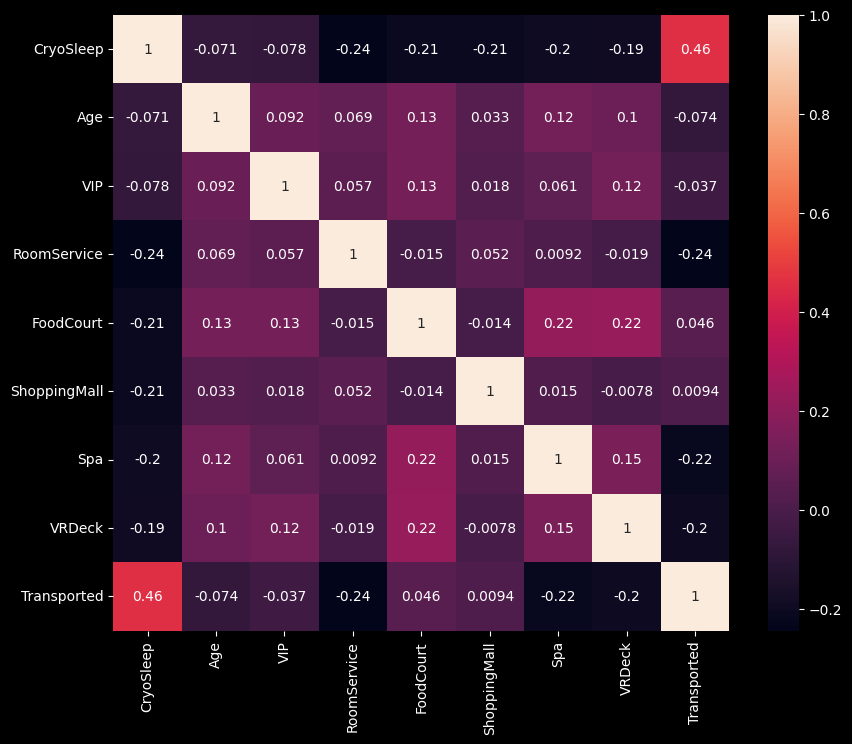

In [171]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, square=True)

In [174]:
data.to_csv("./data/cleaned_data.csv")

## Checking for Outliers

In [3]:
data = pd.read_csv("./data/cleaned_data.csv", index_col="PassengerId")
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


(array([ 591.,  649., 2089., 2155., 1350.,  893.,  536.,  294.,  106.,
          30.]),
 array([ 0. ,  7.9, 15.8, 23.7, 31.6, 39.5, 47.4, 55.3, 63.2, 71.1, 79. ]),
 <BarContainer object of 10 artists>)

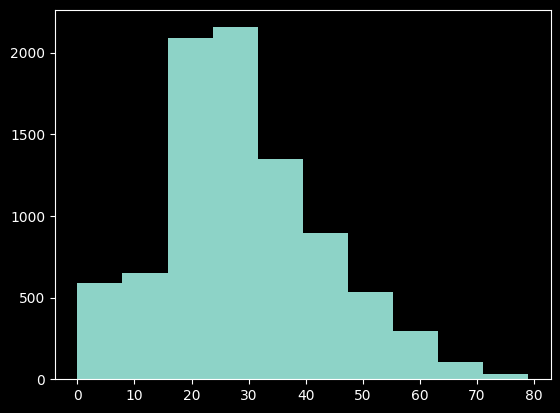

In [7]:
plt.hist(data["Age"], bins=10)

In [18]:
data[data["Age"]>=70]["Transported"].value_counts()

False    26
True     20
Name: Transported, dtype: int64

In [12]:
data["Transported"].value_counts()

True     4378
False    4315
Name: Transported, dtype: int64

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

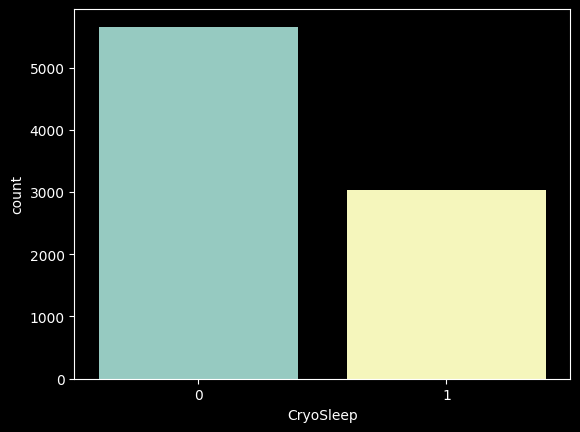

In [22]:
sns.countplot(x=data["CryoSleep"])

- Majority of the passengers were not put into Cryo Sleep

In [24]:
data.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


<AxesSubplot:xlabel='Transported', ylabel='Age'>

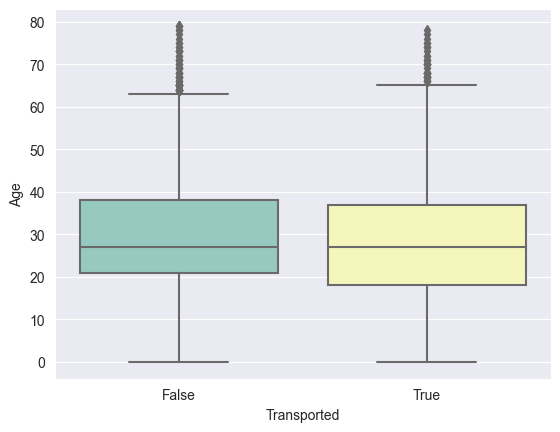

In [26]:
sns.set_style("darkgrid")
sns.boxplot(x=data["Transported"], y=data["Age"])

In [46]:
true_age_des = data.loc[data["Transported"]==True]["Age"].describe()
true_age_des

count    4378.000000
mean       27.733440
std        14.995498
min         0.000000
25%        18.000000
50%        27.000000
75%        37.000000
max        78.000000
Name: Age, dtype: float64

In [51]:
true_iqr = true_age_des["75%"] - true_age_des["25%"]

true_age_outlier = true_age_des["75%"] + 1.5 * true_iqr
true_age_outlier

65.5

In [49]:
false_age_des = data.loc[data["Transported"]==False]["Age"].describe()
false_age_des

count    4315.000000
mean       29.862572
std        13.563579
min         0.000000
25%        21.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [50]:
false_iqr = false_age_des["75%"] - false_age_des["25%"]

false_age_outlier = false_age_des["75%"] + 1.5 * false_iqr
false_age_outlier

63.5

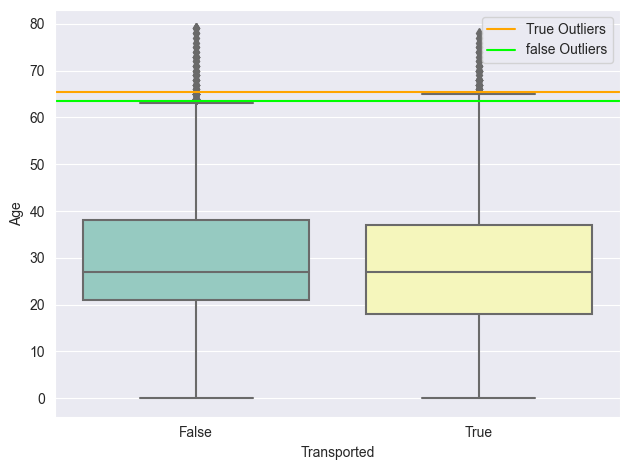

In [57]:
sns.boxplot(x=data["Transported"], y=data["Age"])
plt.axhline(true_age_outlier, label="True Outliers", color="orange")
plt.axhline(false_age_outlier, label="false Outliers", color="#00FF00")
plt.legend()
plt.tight_layout()

In [58]:
data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
PassengerId,,,,,,,,,,,,
0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False
0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True
0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False
0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False
0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True


### Dropping `PassengerId` resetting index

In [60]:
data.reset_index(drop=True, inplace=True)

In [61]:
data.to_csv("./data/cleaned_data.csv", index=False)